In [1]:
import autorootcwd

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.linear_model import LogisticRegression

from src.data import artificial, spam
from src.evaluation import evaluate, search_knn, search_rf, search_xgboost

In [2]:
X_a, y_a = artificial.prepare_data()
X_spam, y_spam = spam.prepare_data()

In [3]:
c_s = [i for i in range(4, 51, 3)]

scores_knn = []
scores_rf = []
scoeres_xgb = []
params_knn_a = []
params_rf_a = []
params_xgb_a = []
features = []
n_features = []

In [4]:
for c in c_s:
    print(f"_____ C={c} _____")
    selector = SelectKBest(score_func=mutual_info_classif, k=c)
    selector.fit(X_a, y_a)

    selected_feature_indices = selector.get_support(indices=True)
    X_selected = X_a[:, selected_feature_indices]
    num_features = X_selected.shape[1]
    print(f"{num_features} features selected")

    params_knn, score_knn = search_knn(X_selected, y_a, num_folds=10)
    params_rf, score_rf = search_rf(X_selected, y_a, num_folds=10)
    params_xgb, score_xgb = search_xgboost(X_selected, y_a, num_folds=10)

    scores = evaluate(X_selected, y_a, params_knn=params_knn, params_rf=params_rf, params_xgb=params_xgb, num_folds=10, scoring_coefficient=0.2)

    scores_knn.append(scores['KNN'][1])
    scores_rf.append(scores['RF'][1])
    scoeres_xgb.append(scores['XGB'][1])
    params_knn_a.append(params_knn)
    params_rf_a.append(params_rf)
    params_xgb_a.append(params_xgb)
    n_features.append(num_features)
    features.append(selected_feature_indices)

    print(f"KNN {scores['KNN'][1]} | RF {scores['RF'][1]} | XGB {scores['XGB'][1]}")

_____ C=4 _____
4 features selected
Fitting 10 folds for each of 28 candidates, totalling 280 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
KNN 0.666 | RF 0.655 | XGB 0.661
_____ C=7 _____
7 features selected
Fitting 10 folds for each of 28 candidates, totalling 280 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
KNN 0.6045 | RF 0.5810000000000001 | XGB 0.5999999999999999
_____ C=10 _____
10 features selected
Fitting 10 folds for each of 28 candidates, totalling 280 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
KNN 0.647 | RF 0.6525 | XGB 0.6375
_____ C=13 _____
13 features selected
Fitting 10 folds for each of 28 candidates, totalling 280 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 8 candidates, to

In [5]:
df = pd.DataFrame(data=np.array([n_features, scores_knn, scores_rf, scoeres_xgb]).transpose(), columns=["features", "knn", "rf", "xgb"])

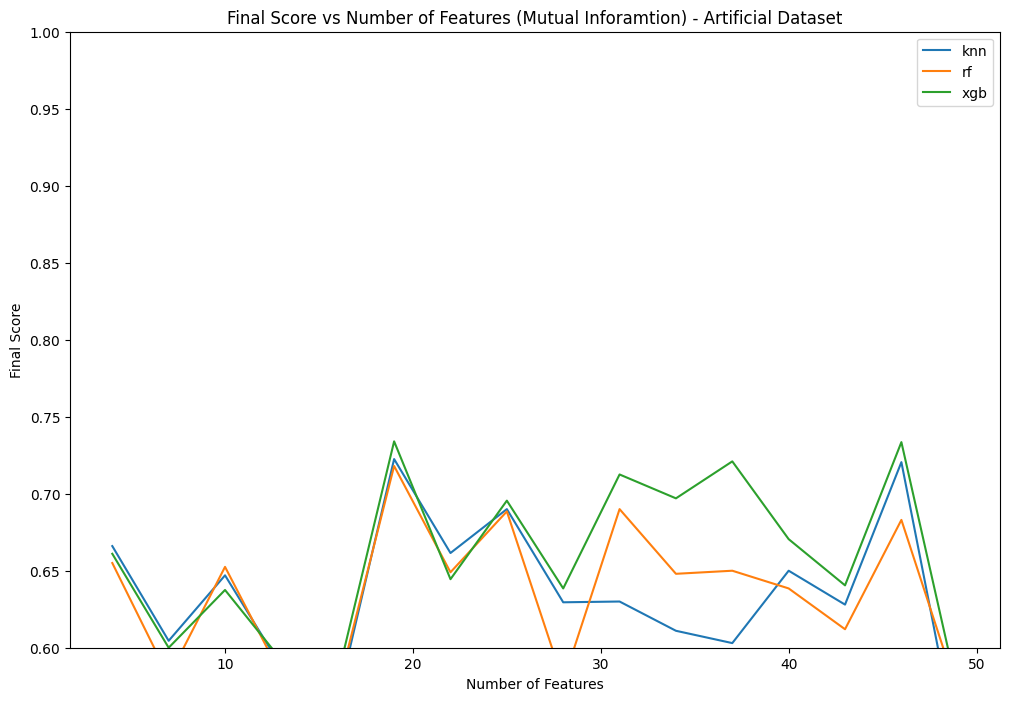

In [6]:
plt.figure(figsize=(12, 8))
plt.title("Final Score vs Number of Features (Mutual Inforamtion) - Artificial Dataset")
plt.xlabel("Number of Features")
plt.ylabel("Final Score")
plt.ylim((0.6, 1.0))

sns.lineplot(data=pd.melt(df, ['features']), x="features", y="value", hue='variable')

plt.legend()
plt.savefig("artificial_mi.png")
plt.show()

In [7]:
scores_knn_spam = []
scores_rf_spam = []
scoeres_xgb_spam = []
params_knn_spam = []
params_rf_spam = []
params_xgb_spam = []
features_spam = []
n_features_spam = []

c_s = [i for i in range(5, 101, 5)]

In [8]:
for c in c_s:
    print(f"_____ C={c} _____")
    selector = SelectKBest(score_func=mutual_info_classif, k=c)
    selector.fit(X_spam, y_spam)

    selected_feature_indices = selector.get_support(indices=True)
    X_selected = X_spam[:, selected_feature_indices]
    num_features = X_selected.shape[1]
    print(f"{num_features} features selected")

    params_knn, score_knn = search_knn(X_selected, y_spam, num_folds=10)
    params_rf, score_rf = search_rf(X_selected, y_spam, num_folds=10)
    params_xgb, score_xgb = search_xgboost(X_selected, y_spam, num_folds=10)

    scores = evaluate(X_selected, y_spam, params_knn=params_knn, params_rf=params_rf, params_xgb=params_xgb, num_folds=10, scoring_coefficient=0.01)

    scores_knn_spam.append(scores['KNN'][1])
    scores_rf_spam.append(scores['RF'][1])
    scoeres_xgb_spam.append(scores['XGB'][1])
    params_knn_spam.append(params_knn)
    params_rf_spam.append(params_rf)
    params_xgb_spam.append(params_xgb)
    n_features_spam.append(num_features)
    features_spam.append(selected_feature_indices)

    print(f"KNN {scores['KNN'][1]} | RF {scores['RF'][1]} | XGB {scores['XGB'][1]}")

_____ C=5 _____
5 features selected
Fitting 10 folds for each of 28 candidates, totalling 280 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
KNN 0.7922390677419963 | RF 0.7699711888378189 | XGB 0.7635665154513896
_____ C=10 _____
10 features selected
Fitting 10 folds for each of 28 candidates, totalling 280 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
KNN 0.8221476760793511 | RF 0.8276793662413855 | XGB 0.8261537033915456
_____ C=15 _____
15 features selected
Fitting 10 folds for each of 28 candidates, totalling 280 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
KNN 0.8541124756254619 | RF 0.8675647393615651 | XGB 0.862397867887586
_____ C=20 _____
20 features selected
Fitting 10 folds for each of 28 candidates, totalling 280 fits
Fitting 10 folds 

In [9]:
df = pd.DataFrame(data=np.array([n_features_spam, scores_knn_spam, scores_rf_spam, scoeres_xgb_spam]).transpose(), columns=["features", "knn", "rf", "xgb"])

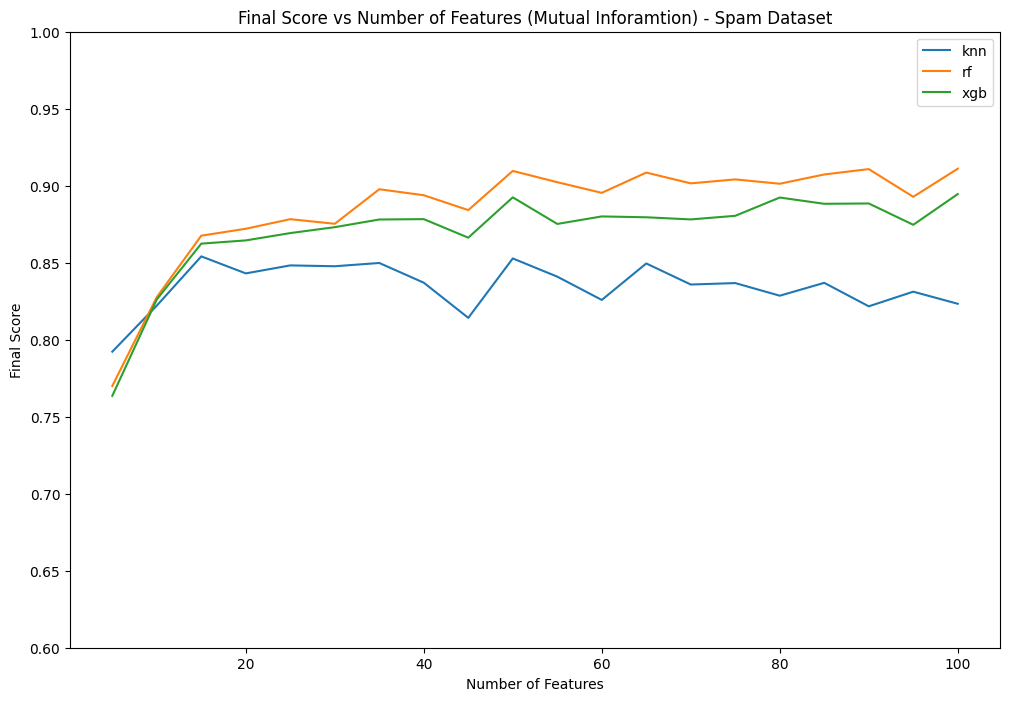

In [10]:
plt.figure(figsize=(12, 8))
plt.title("Final Score vs Number of Features (Mutual Inforamtion) - Spam Dataset")
plt.xlabel("Number of Features")
plt.ylabel("Final Score")
plt.ylim((0.6, 1.0))

sns.lineplot(data=pd.melt(df, ['features']), x="features", y="value", hue='variable')

plt.legend()
plt.savefig("spam_mi.png")
plt.show()

### Artificial analysis

In [11]:
print(np.array(scoeres_xgb).max())
print(np.array(scoeres_xgb).argmax())

0.734
5


In [13]:
print(scoeres_xgb[5])
print(params_xgb_a[5])

0.734
{'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 300}


In [14]:
print(features[5])

[ 12  43  53  64  84 105 117 150 180 241 245 246 335 338 341 434 472 475
 486]


In [15]:
print(n_features[5])

19


### Spam analysis

In [16]:
print(np.array(scores_rf_spam).max())
print(np.array(scores_rf_spam).argmax())

0.9110598357511617
19


In [17]:

print(scores_rf_spam[19])
print(params_rf_spam[19])

0.9110598357511617
{'n_estimators': 100}


In [22]:

print(scores_rf_spam[9])
print(params_rf_spam[9])

0.9096140702353176
{'n_estimators': 300}


In [23]:
print(features_spam[9])

[ 256  302  306  314  533  534  812 1445 1632 1851 1898 1929 1932 2316
 3047 3185 3514 3771 4635 4857 4904 4945 5076 5110 5270 5327 5535 5845
 5893 5919 6003 6564 6603 6641 6831 6943 6969 7093 7119 7120 7256 7284
 7357 7360 7444 7612 7691 7747 7811 7877]


In [24]:
print(n_features_spam[9])

50


### Results

In [27]:
data_ = [
    {"dataset_name": "artificial", "feature_selection_method": "mi", "classifier":"XGB", "best_num_features": 19, "best_score": 0.734},
    {"dataset_name": "spam", "feature_selection_method": "mi", "classifier":"RF", "best_num_features": 50, "best_score": 0.9096140702353176}
]

df_ = pd.DataFrame(data_, columns=["dataset_name", "feature_selection_method", "classifier", "best_num_features", "best_score"])
df_.to_csv("results/mi_results.csv", index=False)